去重前的数据量: 20358
去重后的数据量: 19779
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


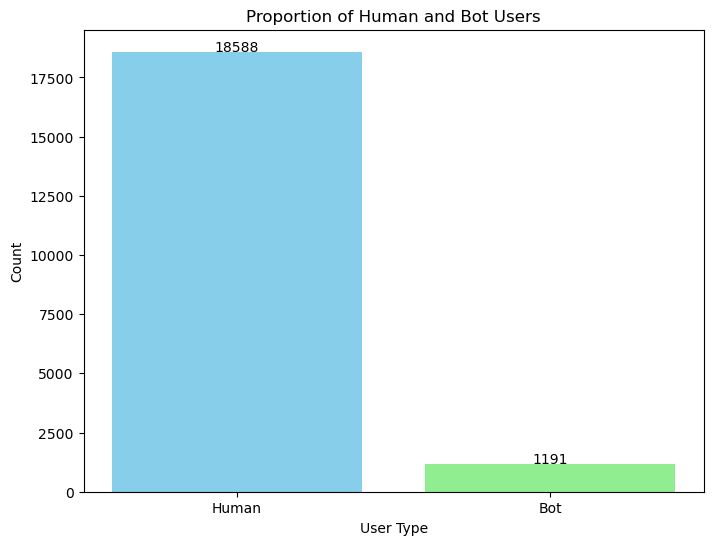

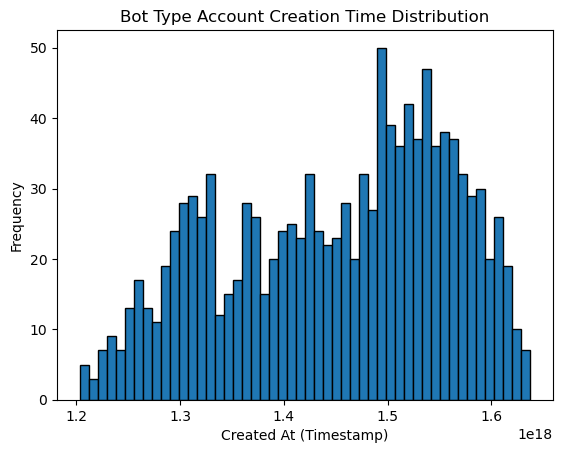

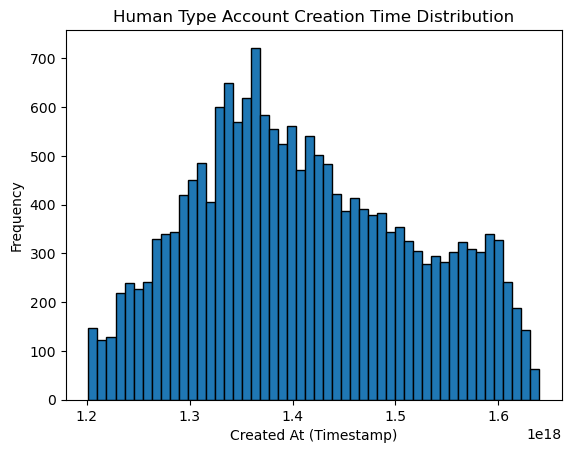

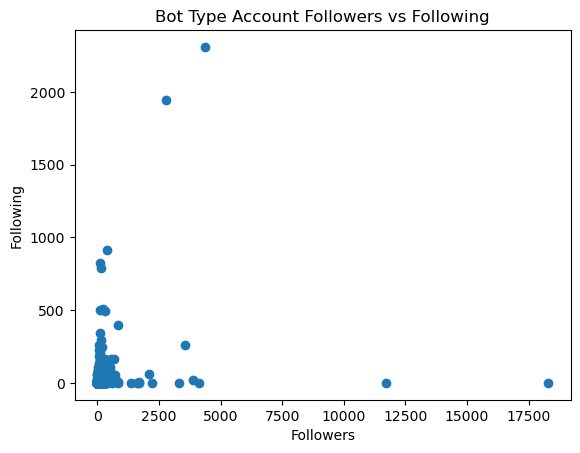

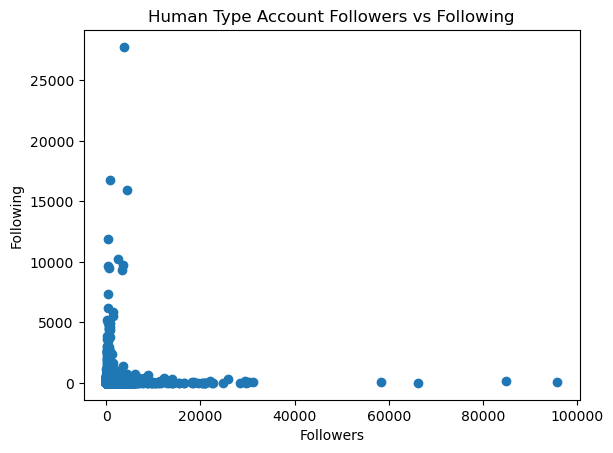

In [1]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

# 删除重复数据
data = data.drop_duplicates()
# 输出去重前后的数据量
print(f"去重前的数据量: {len(raw_data)}")
print(f"去重后的数据量: {len(data)}")


# 去掉 gravatar_id 列
data = data.drop(columns=['gravatar_id'])
# 输出各列的缺失值的情况
print(data.isnull().sum())
# 将可转化成 boolean 变量的列字段转化成 boolean 变量
boolean_columns = ['site_admin','hireable']
for col in boolean_columns:
    data[col] = data[col].astype(bool)
# 选择具有空值的文本列
text_columns = ['name','company','blog','location','email','bio','twitter_username']
for col in text_columns:
    # 用空字符串填充
    data[col] = data[col].fillna('')
# 再次查看是否有缺失值
print(data.isnull().sum())


# 将created_at、updated_at转为时间戳
data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') 
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') 


import matplotlib.pyplot as plt
# 计算数据集中 'Human' 和 'Bot' 类型的数量
human_count = (data['label'] == 'Human').sum()
bot_count = (data['label'] == 'Bot').sum()
labels = ['Human', 'Bot']
sizes = [human_count, bot_count]
# 创建条形图
plt.figure(figsize=(8, 6))  # 设置图形的大小
plt.bar(labels, sizes, color=['skyblue', 'lightgreen'])
# 添加标题和坐标轴标签
plt.title('Proportion of Human and Bot Users')
plt.xlabel('User Type')
plt.ylabel('Count')
# 显示数值标签
for i, size in enumerate(sizes):
    plt.text(i, size + 1, str(size), ha='center')
# 显示图形
plt.show()

# 筛选出 'Bot' 类型的数据
bot_data = data[data['label'] == 'Bot']
# 创建直方图，展示 'Bot' 类型账号的创建时间分布
# bins=50 表示将数据分成50个等宽的条形
plt.hist(bot_data['created_at'], bins=50, edgecolor='black')
plt.title('Bot Type Account Creation Time Distribution')
plt.xlabel('Created At (Timestamp)')
plt.ylabel('Frequency')
plt.show()

human_data = data[data['label'] == 'Human']
plt.hist(human_data['created_at'], bins=50, edgecolor='black')
plt.title('Human Type Account Creation Time Distribution')
plt.xlabel('Created At (Timestamp)')
plt.ylabel('Frequency')
plt.show()

plt.scatter(bot_data['followers'], bot_data['following'])
plt.title('Bot Type Account Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

plt.scatter(human_data['followers'], human_data['following'])
plt.title('Human Type Account Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()
